In [ ]:
!pip install lightgbm
!pip install scikit-optimize

     |████████████████████████████████| 101 kB 4.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import pickle


from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedStratifiedKFold


from skopt import BayesSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Arquivos CSV/iris.csv')

In [ ]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df = data.copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
encoder = LabelEncoder()
df['variety'] = encoder.fit_transform(data['variety'])

In [ ]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df3 = pd.get_dummies(data)

In [ ]:
df3

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
# Valores ausentes
(data.isna().sum() / data.shape[0]) * 100

sepal.length    0.0
sepal.width     0.0
petal.length    0.0
petal.width     0.0
variety         0.0
dtype: float64

# Iterative impute

In [ ]:
# estimator = ExtraTreesRegressor(n_estimators=10, random_state=42)
# it_imp = IterativeImputer(estimator=estimator, missing_values=np.nan, max_iter=10)

# it = it_imp.fit_transform(data)

# Criando pipeline

## 0.1 - Spliting

In [ ]:
X = data.drop('variety', axis=1)
y = data['variety']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## 0.2 Criando pipeline / Baseline

In [ ]:
# pipe_scaler = Pipeline([('scaler', StandardScaler()),
#                         ('lr', LinearRegression())])

In [ ]:
pipe = Pipeline([('clf', LogisticRegression())])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
pipe.score(X_test, y_test)

1.0

## 0.3 Create model GBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
pipe = Pipeline([('model', LGBMClassifier())])

In [ ]:
pipe

Pipeline(memory=None,
         steps=[('model',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('model',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [ ]:
pipe.score(X_test, y_test)

0.9833333333333333

## 0.4 Cros Val Score

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [ ]:
all_scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

In [ ]:
all_scores.mean()

0.9466666666666667

## 0.5 Tune Model, com bayesian optimize

In [ ]:
    grid_params = {'model__learning_rate': [0.01], 'model__n_estimators': [8, 24, 50, 100, 500],
                   'model__num_leaves': [6, 8, 12, 16], 'model__boosting_type': ['gbdt'], 
                   'model__seed': [500],
                   'model__colsample_bytree': [0.65, 0.75, 0.8], 
                   'model__subsample': [0.7, 0.75], 'model__reg_alpha': [1, 2, 6],
                   'model__reg_lambda': [1, 2, 6]}

In [ ]:
model_tune = BayesSearchCV(pipe, [(grid_params, 20)], n_jobs=-1, cv=cv)

In [ ]:
model_tune.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
              error_score='raise',
              estimator=Pipeline(memory=None,
                                 steps=[('model',
                                         LGBMClassifier(boosting_type='gbdt',
                                                        class_weight=None,
                                                        colsample_bytree=1.0,
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                                        min_child_samples=20,
                                                        min_child_weight=0.001,
                                                        min_split_gain=0.0,
                                                        n_estima...
              refit=True,

In [ ]:
model_tune.score(X_test, y_test)

0.9833333333333333

In [ ]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

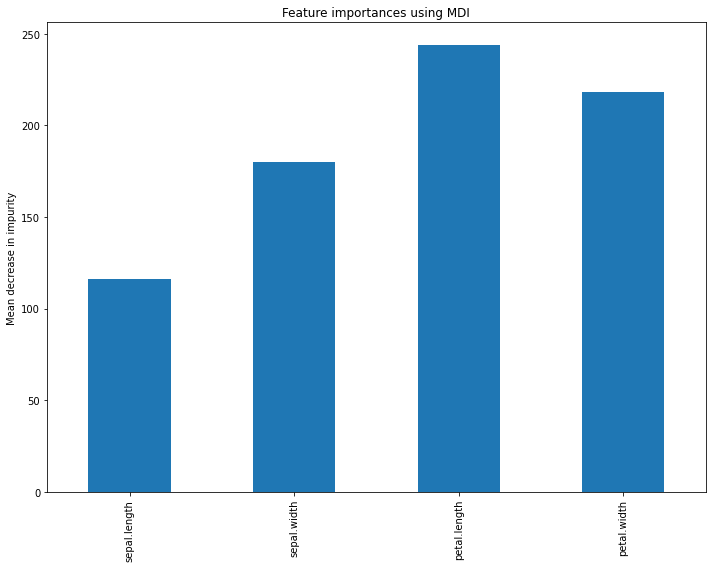

In [ ]:
feature_names = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
importances = pipe.steps[0][1].feature_importances_

forest_importances = pd.Series(importances, index=feature_names) 

fig, ax = plt.subplots(figsize=(10, 8))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 0.6 Model Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = model_tune.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      0.96      0.98        23
  Versicolor       0.95      1.00      0.97        19
   Virginica       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



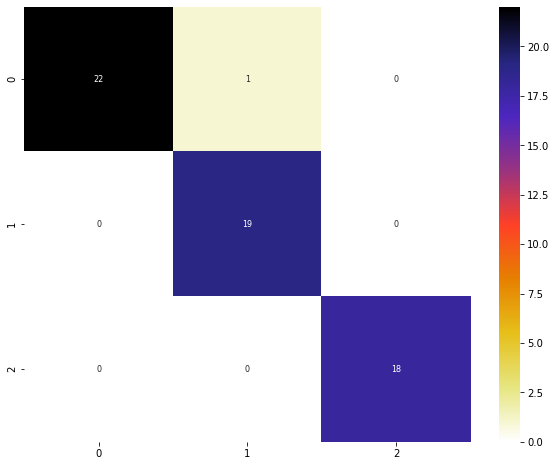

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='CMRmap_r', fmt='.0f', annot_kws={'size': 8})

## 0.7 Save Model

In [ ]:
model_tune.fit(X, y)

In [ ]:
with open('model_gbm.pkl', 'wb') as file:
    pickle.dump(model_tune, file)